# Health Insurance Cross sell Prediction

### Importing necessary packages and opendatasets module to get data from Kaggle

In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import sys
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Downloading the data

In [2]:
od.download('https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction')

Skipping, found downloaded files in ".\health-insurance-cross-sell-prediction" (use force=True to force download)


In [3]:
os.listdir('health-insurance-cross-sell-prediction')

['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
raw_train_df = pd.read_csv('health-insurance-cross-sell-prediction/train.csv')
raw_test_df = pd.read_csv('health-insurance-cross-sell-prediction/test.csv')

In [5]:
raw_train_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [6]:
raw_train_df.Response.value_counts()/raw_train_df.Response.value_counts().sum()

0    0.877437
1    0.122563
Name: Response, dtype: float64

In [7]:
raw_test_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


### Exploratory Data Analysis

In [8]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [10]:
raw_train_df.shape

(381109, 12)

In [11]:
raw_test_df.shape

(127037, 11)

In [12]:
raw_train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
raw_train_df.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


### Visualization of data

In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Response (Target variable)

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


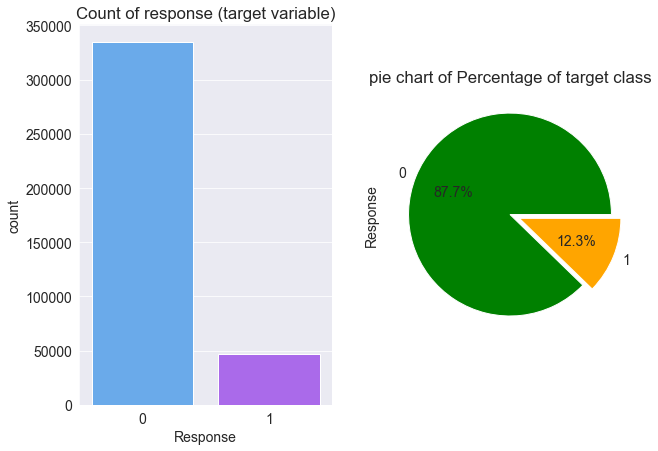

In [15]:
plt.subplot(1, 2, 1)
sns.countplot(x=raw_train_df['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2,2)
count = raw_train_df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

print( "Percentage of target class\n")
print(raw_train_df['Response'].value_counts()/len(raw_train_df)*100)

- By the plot we can say that this is the problem of imbalance binary classification problem
- The individuals interested is 87 % as compared to the other one.

#### Gender Variable

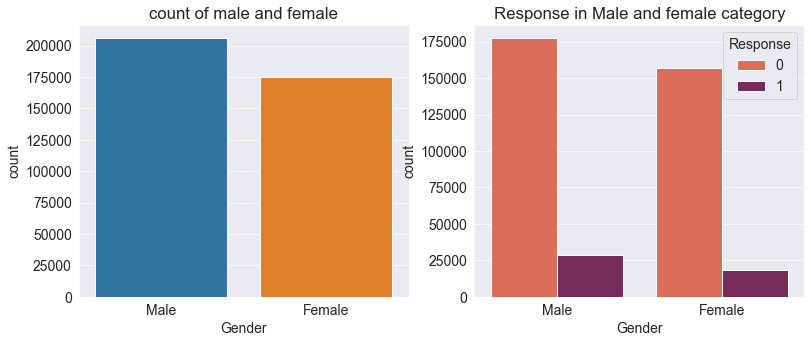

In [16]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=raw_train_df['Gender'])
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x=raw_train_df['Gender'], hue = raw_train_df['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()

- By the plot we can say that this is the problem of imbalance binary classification problem
- The indivisuals interested is 87 % as compared to the other one.

#### Age Variable

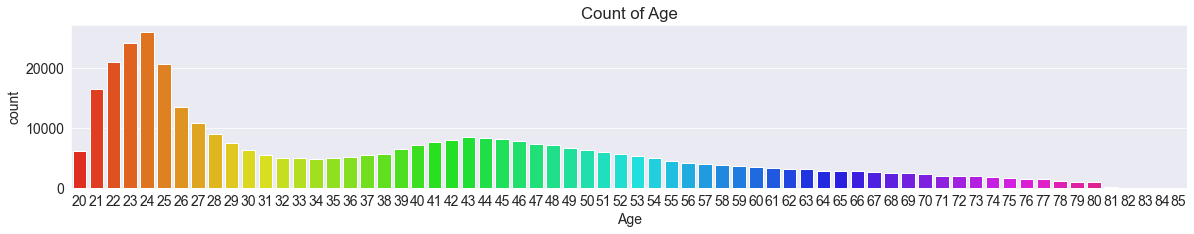

In [17]:
plt.figure(figsize = (20,3))
sns.countplot(x=raw_train_df['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

<AxesSubplot:xlabel='Age'>

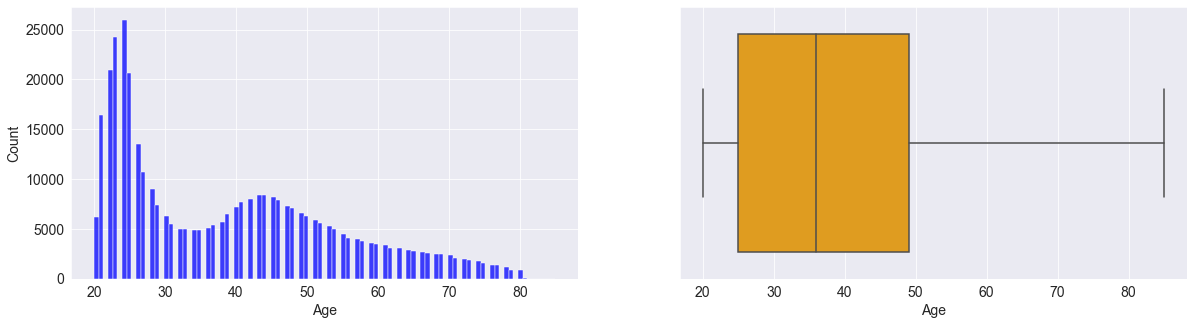

In [18]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.histplot(x=raw_train_df['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(x=raw_train_df['Age'],ax = axx[1],color='Orange')

- Count of the individuals with age 24 are greater in the dataset
- Variable Age looks like right skewed
- From the boxplot we observe that here is not serious outliers in the data

#### Driving License

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


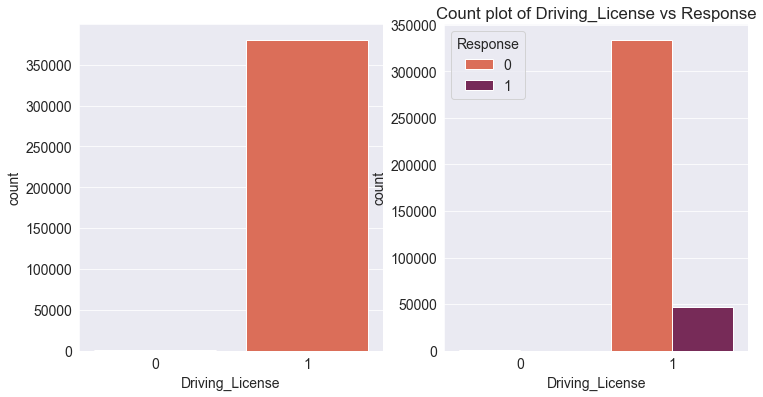

In [19]:
print("Percentage of  Driving_License feature\n ")
print(raw_train_df['Driving_License'].value_counts()/len(raw_train_df)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(x=raw_train_df['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot(x='Driving_License', hue = 'Response',ax =axx[1],data = raw_train_df,palette="rocket_r")
plt.show()

- Customers who have the DL are 99%
- Customers who are interested in Vehicle Insurance almost all have driving license

#### Region Code

C:\Users\mihir\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


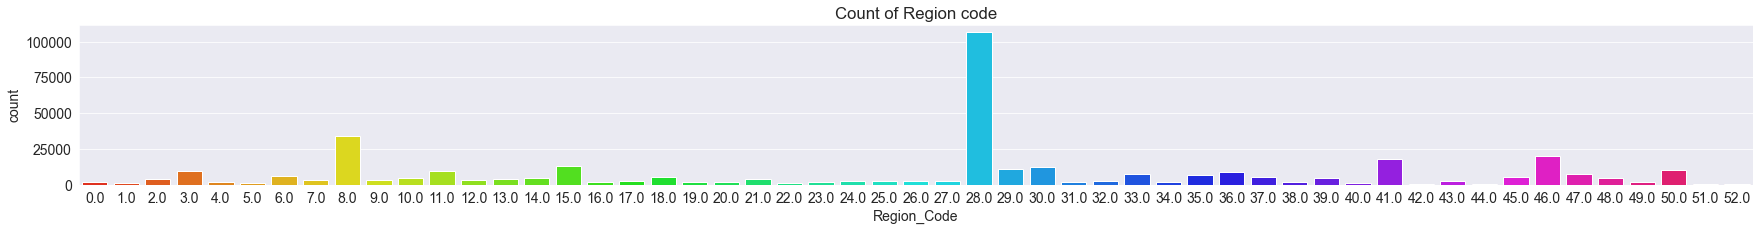

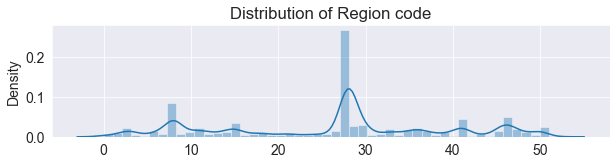

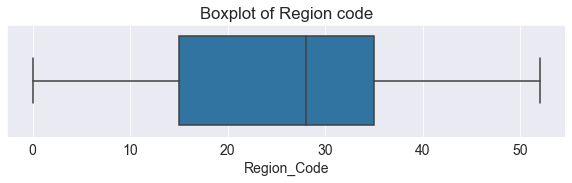

In [20]:
plt.figure(figsize = (30,10))
plt.subplot(3,1,1)
sns.countplot(x=raw_train_df['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(x=raw_train_df['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,3)
sns.boxplot(x=raw_train_df['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

- The individuals with region code 28 the highest as compared to the other ones
- From the box plot it looks like there is no outliers in the data
- Further we can analyze which region has highest interested customers

#### Previously Insured

Percentage ofPreviously_Insured feature
 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

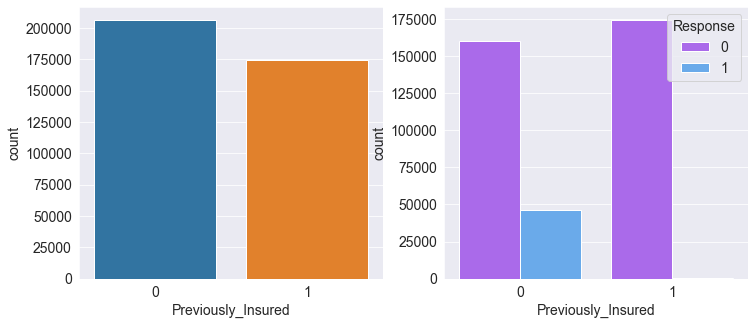

In [21]:
print("Percentage ofPreviously_Insured feature\n ")
print(raw_train_df['Previously_Insured'].value_counts()/len(raw_train_df)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(x=raw_train_df['Previously_Insured'],ax = axx[0])
sns.countplot(x='Previously_Insured', hue = 'Response',ax =axx[1],data = raw_train_df,palette="cool_r")

- The variable previously insured almost has equal count
- Customer who are not previously insured are likely to be interested

#### Vehicle Age

Percentage of vechicle age feature
 
1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64


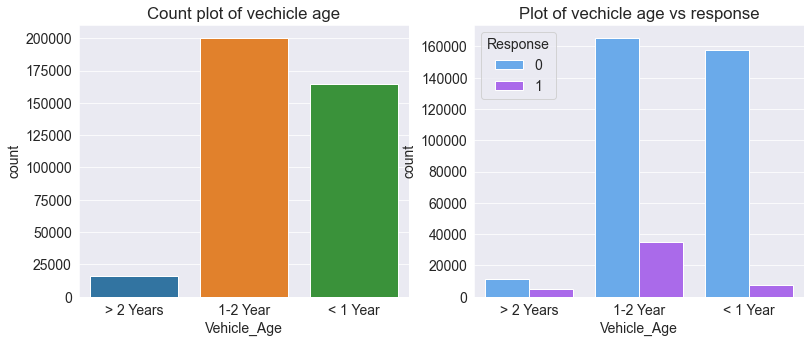

In [22]:
print("Percentage of vechicle age feature\n ")
print(raw_train_df['Vehicle_Age'].value_counts()/len(raw_train_df)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=raw_train_df['Vehicle_Age'])
plt.title("Count plot of vechicle age")
plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.countplot(x='Vehicle_Age', hue = 'Response',data = raw_train_df,palette="cool")
plt.show()

- There is very less number of customers with vehicle age less than 2 years
- Customers with vehicle age 1-2 years are more likely to interested as compared to the other two

#### Vehicle damage

Percentage of vechicle damage feature
 
Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64


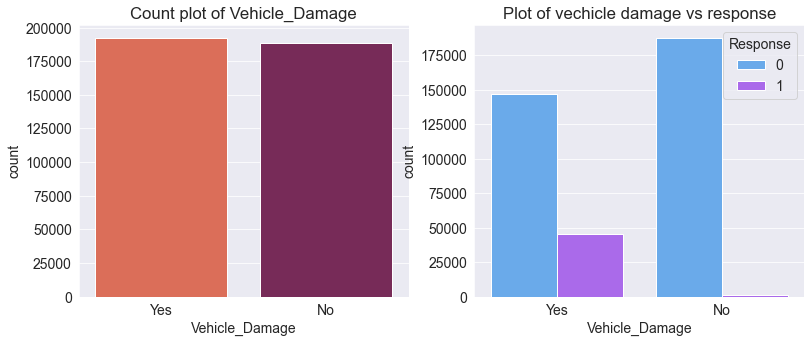

In [23]:
print("Percentage of vechicle damage feature\n ")
print(raw_train_df['Vehicle_Damage'].value_counts()/len(raw_train_df)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=raw_train_df['Vehicle_Damage'],palette="rocket_r")
plt.title("Count plot of Vehicle_Damage")

plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot(x='Vehicle_Damage', hue = 'Response',data = raw_train_df,palette="cool")
plt.show()

- Customers with vehicle damage (Yes and NO) are equally distributed with (50.48 % , 49.51 %)
- Customers with vehicle damage are more interested in Vehicle Insurance

#### Annual_Premium

C:\Users\mihir\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


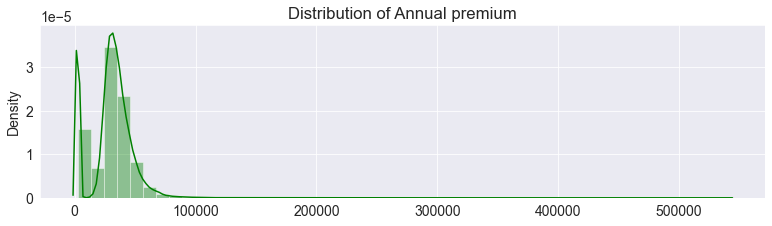

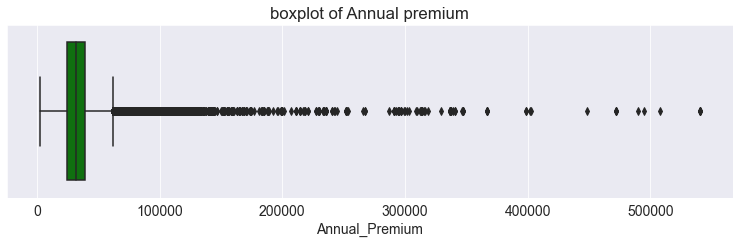

In [24]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(x=raw_train_df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
#print("-------------------------------------")
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(x=raw_train_df['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

- From the distribution plot we can infer that the annual premium variable is right skewed
- From the boxplot we can observe lot of outliers in the variable

#### Policy_Sales_Channel

C:\Users\mihir\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


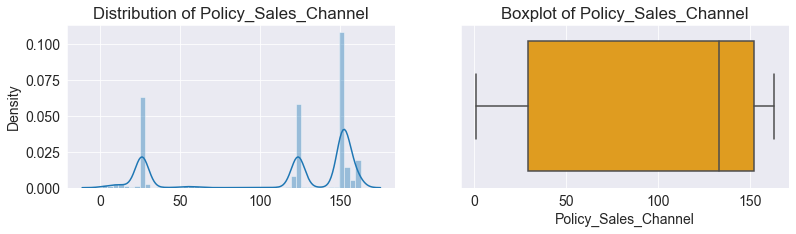

In [25]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(x=raw_train_df['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(x=raw_train_df['Policy_Sales_Channel'],color='Orange')
plt.show()

#### Vintage

C:\Users\mihir\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


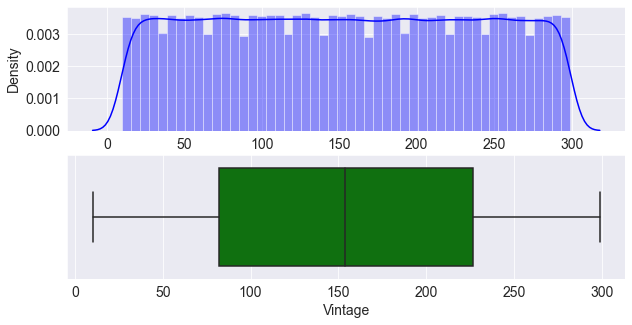

In [26]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
axx = ax.flatten()
sns.distplot(x=raw_train_df['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(x=raw_train_df['Vintage'],ax=axx[1],color='green')
plt.show()

In [27]:
col = raw_train_df.columns.tolist()
col.remove('id')

<AxesSubplot:title={'center':'Correlation plot'}>

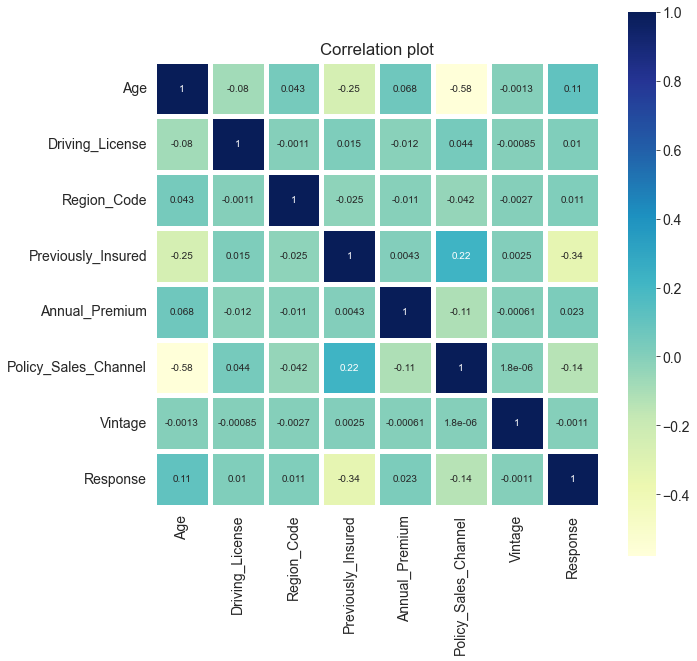

In [28]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(raw_train_df[col].corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

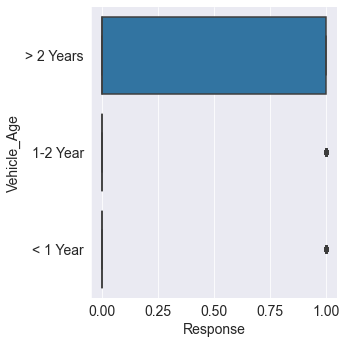

In [29]:
sns.catplot(x="Response", y="Vehicle_Age", data=raw_train_df, kind="box")

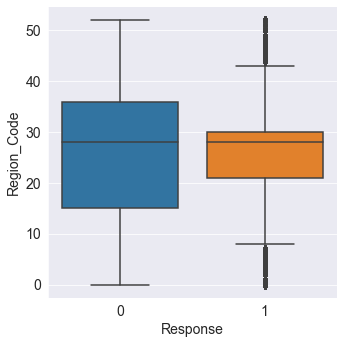

In [30]:
sns.catplot(x="Response", y="Region_Code", data=raw_train_df, kind="box")

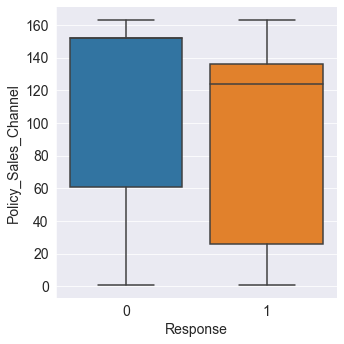

In [31]:
sns.catplot(x="Response", y="Policy_Sales_Channel", data=raw_train_df, kind="box")

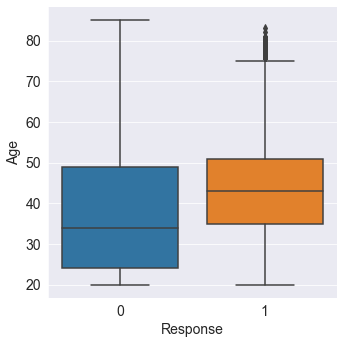

In [32]:
sns.catplot(x="Response", y="Age", data=raw_train_df, kind="box")

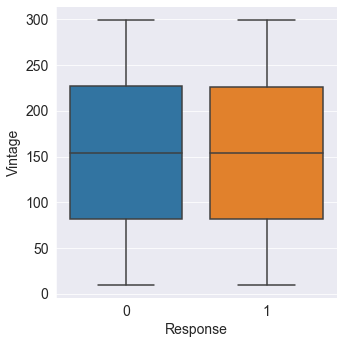

In [33]:
sns.catplot(x="Response", y="Vintage", data=raw_train_df, kind="box")

### Data Preprocessing

In [34]:
raw_train_df["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [35]:
raw_test_df["Gender"].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

In [36]:
raw_train_df["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [37]:
raw_train_df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [38]:
raw_test_df["Vehicle_Age"].value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

#### Encoding Categorical Columns

In [39]:
def categorical_data_preprocessing(df):
    df.drop("id" , axis = 1 , inplace = True)
    df["Vehicle_Age"].replace({"> 2 Years":3,"1-2 Year":2,"< 1 Year":1},inplace = True)
    df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
    df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"Yes":1,"No":0})
    return df

In [40]:
train_df = categorical_data_preprocessing(raw_train_df)

In [41]:
test_df = categorical_data_preprocessing(raw_test_df)

In [42]:
train_df.shape

(381109, 11)

In [43]:
test_df.shape

(127037, 10)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  int64  
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  int64  
 6   Vehicle_Damage        127037 non-null  int64  
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.7 MB


#### Scaling Numeric Data

In [46]:
numeric_cols = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [49]:
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [50]:
train_df.describe().loc[['min', 'max']]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0


In [51]:
test_df.describe().loc[['min', 'max']]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.873268,1.0,1.0


In [52]:
train_df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,1,0.538462,0,3,1,0.070366,0.154321,0.716263,1
1,1,0.861538,1,0.057692,0,2,0,0.057496,0.154321,0.598616,0
2,1,0.415385,1,0.538462,0,3,1,0.066347,0.154321,0.058824,1
3,1,0.015385,1,0.211538,1,1,0,0.048348,0.932099,0.667820,0
4,0,0.138462,1,0.788462,1,1,0,0.046259,0.932099,0.100346,0
5,0,0.061538,1,0.634615,0,1,1,0.000000,0.981481,0.574394,0
6,1,0.046154,1,0.211538,0,1,1,0.038578,0.932099,0.826990,0
7,0,0.553846,1,0.538462,0,2,1,0.054696,0.154321,0.214533,1
8,0,0.061538,1,0.057692,1,1,0,0.046488,0.932099,0.062284,0
9,0,0.184615,1,0.115385,1,1,0,0.048631,0.932099,0.242215,0


In [53]:
test_df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.076923,1,0.211538,1,1,0,0.061682,0.932099,0.148789
1,1,0.307692,1,0.538462,0,2,1,0.057916,0.037037,0.349481
2,1,0.415385,1,0.538462,0,2,1,0.069614,0.759259,0.653979
3,1,0.061538,1,0.519231,1,1,1,0.064602,0.932099,0.612457
4,1,0.107692,1,0.538462,1,1,0,0.105048,0.932099,0.993080
5,1,0.030769,1,0.576923,1,1,0,0.069906,0.932099,0.885813
6,0,0.476923,1,0.711538,1,2,0,0.069741,0.154321,0.335640
7,1,0.076923,1,0.788462,1,1,0,0.038593,0.932099,0.768166
8,1,0.338462,1,0.788462,0,2,1,0.000000,0.154321,0.923875
9,0,0.261538,1,0.230769,1,2,0,0.045567,0.759259,0.425606


#### Training, Validation and Test Data

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample=SMOTE()
X,y=oversample.fit_resample(train_df.iloc[:,:10],train_df.iloc[:,10])

In [56]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'Response'

In [57]:
raw_train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,1,0.538462,0,3,1,0.070366,0.154321,0.716263,1
1,1,0.861538,1,0.057692,0,2,0,0.057496,0.154321,0.598616,0
2,1,0.415385,1,0.538462,0,3,1,0.066347,0.154321,0.058824,1
3,1,0.015385,1,0.211538,1,1,0,0.048348,0.932099,0.667820,0
4,0,0.138462,1,0.788462,1,1,0,0.046259,0.932099,0.100346,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0.500000,1,2,0,0.051234,0.154321,0.269896,0
381105,1,0.153846,1,0.711538,1,1,0,0.069551,0.932099,0.418685,0
381106,1,0.015385,1,0.576923,1,1,0,0.060439,0.981481,0.522491,0
381107,0,0.738462,1,0.269231,0,3,1,0.078110,0.759259,0.221453,0


In [58]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.369231,1,0.538462,0,3,1,0.070366,0.154321,0.716263
1,1,0.861538,1,0.057692,0,2,0,0.057496,0.154321,0.598616
2,1,0.415385,1,0.538462,0,3,1,0.066347,0.154321,0.058824
3,1,0.015385,1,0.211538,1,1,0,0.048348,0.932099,0.667820
4,0,0.138462,1,0.788462,1,1,0,0.046259,0.932099,0.100346
...,...,...,...,...,...,...,...,...,...,...
668793,1,0.400000,1,0.538462,0,2,1,0.048190,0.150338,0.920637
668794,0,0.051046,1,0.258449,0,1,1,0.038317,0.154321,0.211992
668795,1,0.482191,1,0.545047,0,2,1,0.062712,0.759259,0.456747
668796,0,0.243003,1,0.056379,0,2,1,0.000000,0.962963,0.796084


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_val.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
436373,0,0.318332,1,0.538462,0,2,1,0.074566,0.759259,0.807296
414084,0,0.290139,1,0.788462,0,2,1,0.073902,0.746206,0.253174
28340,1,0.553846,1,0.538462,1,2,0,0.076977,0.154321,0.141869
495878,1,0.603737,1,0.538462,0,2,1,0.082508,0.154321,0.467226
625770,1,0.149095,1,0.545108,0,1,1,0.039844,0.759259,0.938658
64018,0,0.061538,1,0.153846,1,1,0,0.054238,0.932099,0.131488
465540,0,0.307692,1,0.747454,0,2,1,0.043874,0.759259,0.946469
221863,1,0.200000,1,0.750000,0,2,1,0.000000,0.962963,0.038062
394939,0,0.467951,1,0.508016,0,2,1,0.066859,0.915127,0.482266
333415,0,0.846154,1,0.653846,0,3,1,0.058225,0.759259,0.245675


In [62]:
len(X_val)

133760

In [63]:
y_val.head(10)

436373    1
414084    1
28340     0
495878    1
625770    1
64018     0
465540    1
221863    0
394939    1
333415    0
Name: Response, dtype: int64

In [64]:
len(y_val)

133760

### Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
model = LogisticRegression(solver='liblinear')

In [67]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [68]:
%%time
y_train_preds = model.predict(X_train)
y_train_probs = model.predict_proba(X_train)
accuracy_score(y_train, y_train_preds)

CPU times: total: 78.1 ms
Wall time: 80.7 ms


0.7835817269053786

In [69]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 78.61%
CPU times: total: 109 ms
Wall time: 92.4 ms


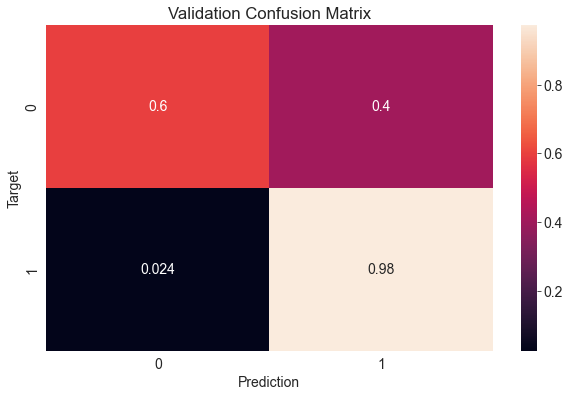

In [70]:
%%time
val_preds = predict_and_plot(X_val, y_val, 'Validation')

Logistic Regression Model -

Training Accuracy - 78.35032278081183%

Validation Accuracy - 78.58%

### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model_2 = DecisionTreeClassifier(random_state=42)

In [73]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
%%time
y_train_preds_2 = model_2.predict(X_train)
y_train_probs_2 = model_2.predict_proba(X_train)
accuracy_score(y_train, y_train_preds_2)

CPU times: total: 406 ms
Wall time: 386 ms


0.9999289770072406

In [75]:
def predict_and_plot_2(inputs, targets, name=''):
    preds = model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 88.75%
CPU times: total: 125 ms
Wall time: 129 ms


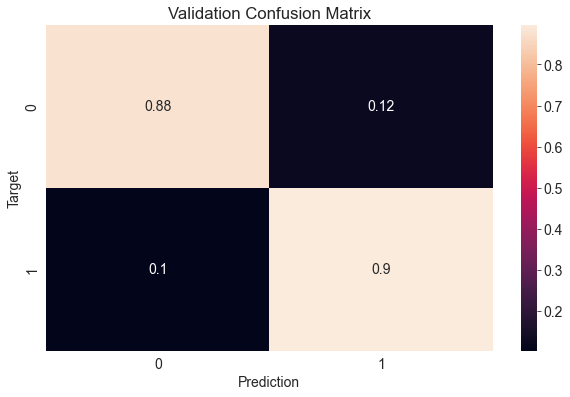

In [76]:
%%time
val_preds = predict_and_plot_2(X_val, y_val, 'Validation')

Decision Tree Model without hyperparameter tuning-

Training Accuracy - 99.99289770072406%

Validation Accuracy - 88.71%

### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model_3 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [79]:
model_3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
%%time
model_3.score(X_train, y_train)

CPU times: total: 34.6 s
Wall time: 2.96 s


0.9999233699288649

In [81]:
%%time
model_3.score(X_val, y_val)

CPU times: total: 9.23 s
Wall time: 652 ms


0.9107431220095694

In [82]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 91.07%
CPU times: total: 8.12 s
Wall time: 764 ms


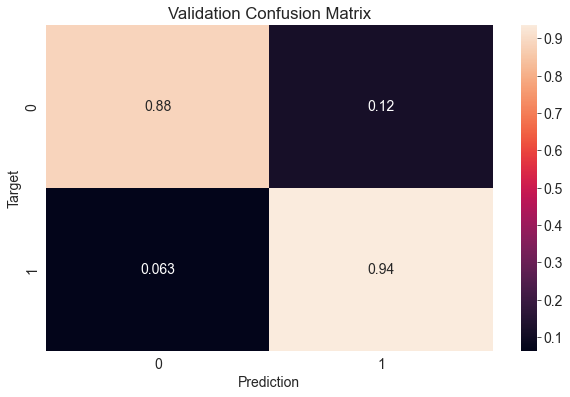

In [83]:
%%time
val_preds_3 = predict_and_plot_3(X_val, y_val, 'Validation')

Random Forest Classifier without hyperparameter tuning-

Training Accuracy - 99.99252389549901%

Validation Accuracy - 91.08%

#### Visualization and Hyperparameter Tuning of Decision Tree

In [84]:
from sklearn.tree import plot_tree, export_text

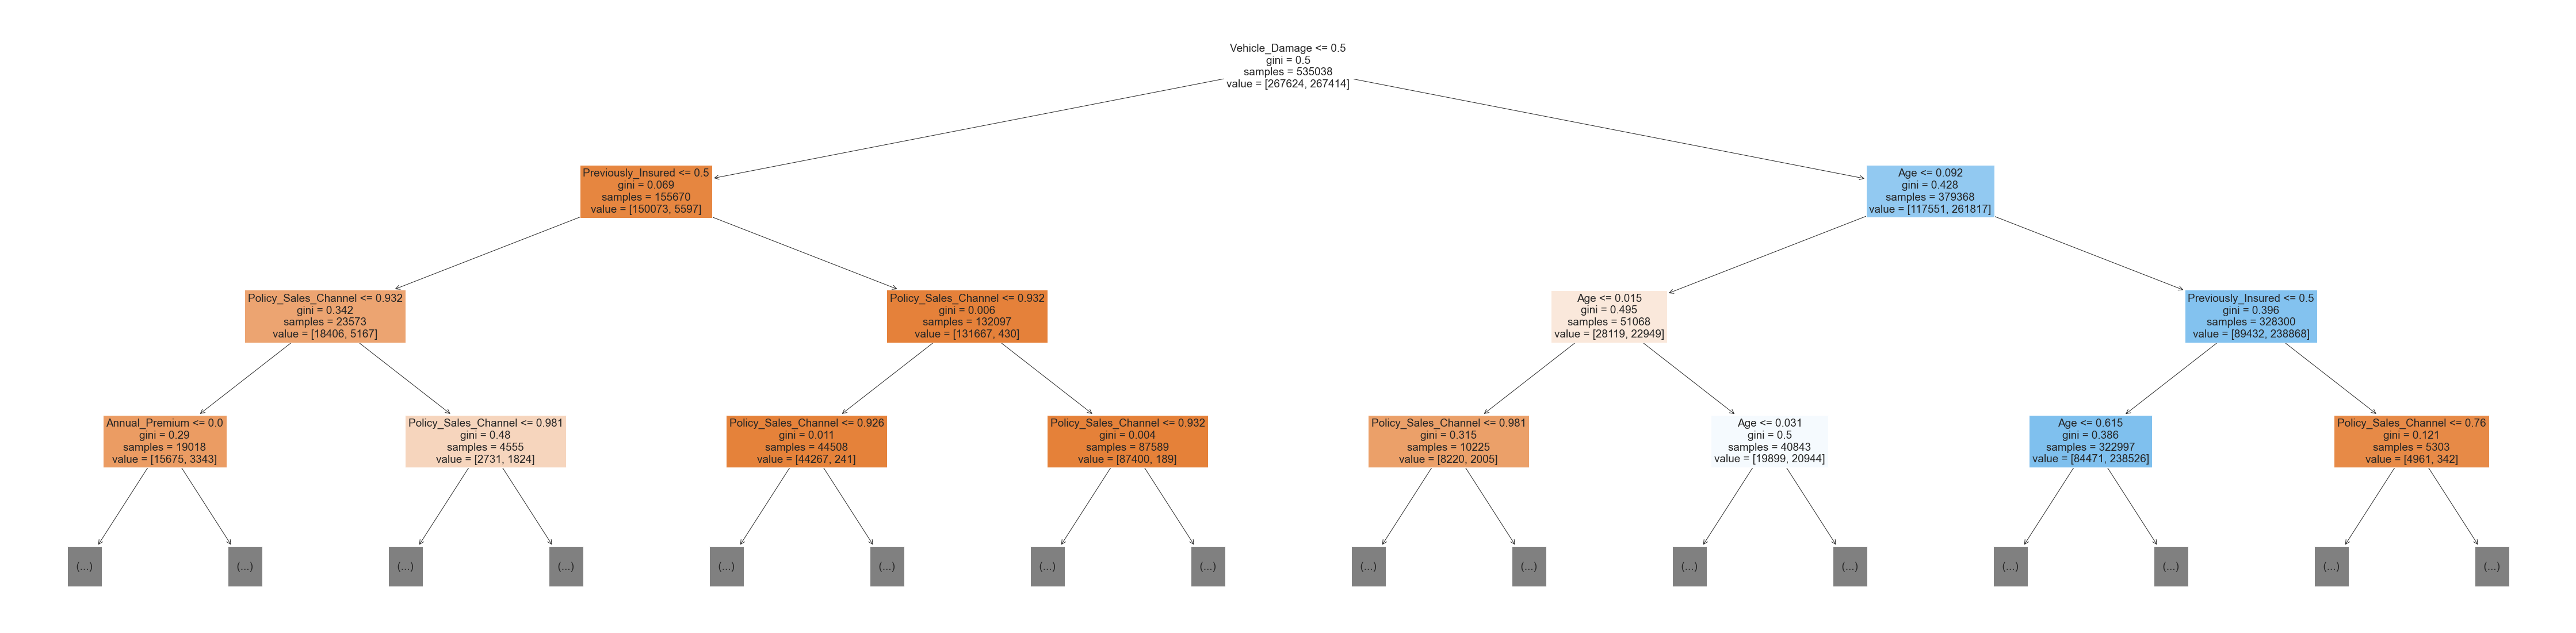

In [85]:
plt.figure(figsize=(80,20))
plot_tree(model_2, feature_names=X_train.columns, max_depth=3, filled=True);

In [86]:
model_2.feature_importances_

array([1.39068079e-02, 2.15507289e-01, 2.14813455e-04, 6.77480601e-02,
       2.58077131e-02, 9.77361204e-03, 3.53199997e-01, 1.10183259e-01,
       6.38385314e-02, 1.39819918e-01])

In [87]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_2.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
6,Vehicle_Damage,0.353200
1,Age,0.215507
9,Vintage,0.139820
7,Annual_Premium,0.110183
3,Region_Code,0.067748
8,Policy_Sales_Channel,0.063839
4,Previously_Insured,0.025808
0,Gender,0.013907
5,Vehicle_Age,0.009774
2,Driving_License,0.000215


#### Testing for max_depth hyperparameter

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
params_grid = {
    'max_depth':[10,20,30,40,50]
}

In [90]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [91]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50]})

In [92]:
model_2_1 = grid.best_estimator_

In [93]:
%%time
model_2_1.score(X_train,y_train)

CPU times: total: 219 ms
Wall time: 208 ms


0.9852085272447938

In [94]:
%%time
model_2_1.score(X_val,y_val)

CPU times: total: 46.9 ms
Wall time: 60.9 ms


0.884696471291866

#### Testing for max_leaf_nodes hyperparameter

In [95]:
params_grid = {
    'max_leaf_nodes':[5,10,15,20,25]
}

In [96]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [97]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25]})

In [98]:
grid.best_params_

{'max_leaf_nodes': 25}

In [99]:
model_2_2 = grid.best_estimator_

In [100]:
%%time
model_2_2.score(X_train,y_train)

CPU times: total: 109 ms
Wall time: 107 ms


0.8173026962570883

In [101]:
%%time
model_2_2.score(X_val,y_val)

CPU times: total: 31.2 ms
Wall time: 32 ms


0.8196172248803828

#### Testing for criterion and splitter hyperparameter

In [102]:
params_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}

In [103]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [104]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [105]:
grid.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [106]:
model_2_3 = grid.best_estimator_

In [107]:
%%time
model_2_3.score(X_train,y_train)

CPU times: total: 234 ms
Wall time: 241 ms


0.9999289770072406

In [108]:
%%time
model_2_3.score(X_val,y_val)

CPU times: total: 46.9 ms
Wall time: 58.6 ms


0.8877018540669857

#### Using all the best parameters

In [109]:
model_2_tuned = DecisionTreeClassifier(random_state=42,
                                       criterion='entropy',
                                       splitter='best',
                                       max_leaf_nodes=5,
                                       max_depth=10)

In [110]:
model_2_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       random_state=42)

In [111]:
%%time
model_2_tuned.score(X_train,y_train)

CPU times: total: 109 ms
Wall time: 108 ms


0.7881290674681051

In [112]:
%%time
model_2_tuned.score(X_val,y_val)

CPU times: total: 46.9 ms
Wall time: 30.7 ms


0.7902063397129186

Decision Tree with hyperparameter tuning-

Training Accuracy - 78.96728830475592%

Validation Accuracy - 79.13800837320574%

The training accuracy reduced but the validation accuracy improved significantly.

## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier


In [114]:
model_3 = RandomForestClassifier(n_jobs=-1, random_state=42)


In [115]:
model_3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [116]:
%%time
model_3.score(X_train, y_train)

CPU times: total: 36.8 s
Wall time: 2.72 s


0.9999233699288649

In [117]:
%%time
model_3.score(X_val, y_val)

CPU times: total: 9.39 s
Wall time: 703 ms


0.9107431220095694

In [118]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 91.07%
CPU times: total: 9.47 s
Wall time: 776 ms


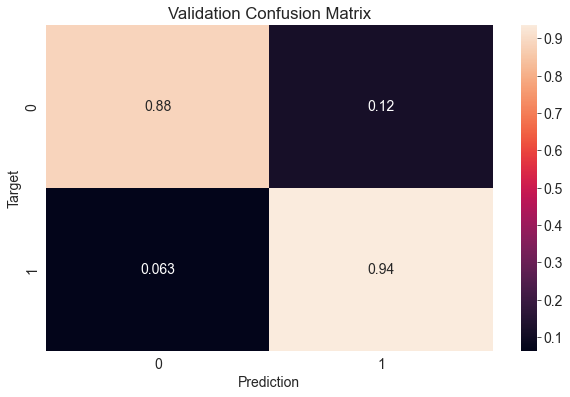

In [119]:
%%time
val_preds_3 = predict_and_plot_3(X_val, y_val, 'Validation')

Random Forest Classifier without hyperparameter tuning-

Training Accuracy - 99.99252389549901%

Validation Accuracy - 91.08%

#### Hyperparameter Tuning of Random Forest

In [120]:
model_3.feature_importances_


array([0.00633266, 0.18787217, 0.00054542, 0.08367112, 0.1413149 ,
       0.02706013, 0.19465908, 0.12587037, 0.08116248, 0.15151168])

In [121]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,Vehicle_Damage,0.194659
1,Age,0.187872
9,Vintage,0.151512
4,Previously_Insured,0.141315
7,Annual_Premium,0.125870
3,Region_Code,0.083671
8,Policy_Sales_Channel,0.081162
5,Vehicle_Age,0.027060
0,Gender,0.006333
2,Driving_License,0.000545


#### Testing for n_estimators hyperparameter

In [122]:
model_3_1_1 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 10)


In [123]:
model_3_1_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [124]:
%%time
model_3_1_1.score(X_train, y_train)

CPU times: total: 2.98 s
Wall time: 413 ms


0.9956283478930469

In [125]:
%%time
model_3_1_1.score(X_val, y_val)

CPU times: total: 438 ms
Wall time: 143 ms


0.9026390550239235

In [126]:
%%time
model_3_1_2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 20)
model_3_1_2.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_2.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_2.score(X_val, y_val))

Training Accuracy = 0.9988935365338537
Validation Accuracy = 0.9069078947368421
CPU times: total: 1min 6s
Wall time: 6.88 s


In [127]:
%%time
model_3_1_3 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 50)
model_3_1_3.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_3.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_3.score(X_val, y_val))

Training Accuracy = 0.9998430018054792
Validation Accuracy = 0.9099506578947368
CPU times: total: 3min 2s
Wall time: 13.6 s


In [128]:
%%time
model_3_1_4 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 100)
model_3_1_4.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_4.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_4.score(X_val, y_val))

Training Accuracy = 0.9999233699288649
Validation Accuracy = 0.9107431220095694
CPU times: total: 6min 13s
Wall time: 25.2 s


In [129]:
%%time
model_3_1_5 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 150)
model_3_1_5.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_5.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_5.score(X_val, y_val))

Training Accuracy = 0.9999289770072406
Validation Accuracy = 0.9102870813397129
CPU times: total: 9min 24s
Wall time: 37.4 s


#### Testing for max__features hyperparameter

In [130]:
%%time
model_3_2_1 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 2)
model_3_2_1.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_1.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_1.score(X_val, y_val))

Training Accuracy = 0.9999289770072406
Validation Accuracy = 0.9079321172248804
CPU times: total: 5min 7s
Wall time: 23.6 s


In [131]:
%%time
model_3_2_2 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 3)
model_3_2_2.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_2.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_2.score(X_val, y_val))

Training Accuracy = 0.9999233699288649
Validation Accuracy = 0.9107431220095694
CPU times: total: 5min 45s
Wall time: 28.7 s


In [132]:
%%time
model_3_2_3 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 6)
model_3_2_3.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_3.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_3.score(X_val, y_val))

Training Accuracy = 0.9999158938243639
Validation Accuracy = 0.9149372009569378
CPU times: total: 9min 14s
Wall time: 39.2 s


In [133]:
%%time
model_3_2_4 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 8)
model_3_2_4.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_4.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_4.score(X_val, y_val))

Training Accuracy = 0.9999102867459881
Validation Accuracy = 0.9139503588516746
CPU times: total: 11min 26s
Wall time: 46.5 s


In [134]:
%%time
model_3_2_5 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 10)
model_3_2_5.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_5.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_5.score(X_val, y_val))

Training Accuracy = 0.9999102867459881
Validation Accuracy = 0.9118869617224881
CPU times: total: 14min 28s
Wall time: 58.5 s


### Using all best parameters

In [135]:
model_3_tuned = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=100,
                               max_features=6)

In [136]:
model_3_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_jobs=-1, random_state=42)

In [137]:
%%time
model_3_tuned.score(X_train, y_train)

CPU times: total: 30.2 s
Wall time: 2.27 s


0.9999158938243639

In [138]:
%%time
model_3_tuned.score(X_val, y_val)

CPU times: total: 7.45 s
Wall time: 534 ms


0.9149372009569378

Random Forest with hyperparameter tuning-

Training Accuracy - 99.99196318766144%

Validation Accuracy - 91.42568779904306%

Not much change was observed by changing and tuning these hyperparameters.

## Saving Best Model and Predicting on Test Data

In [139]:
import pickle

In [140]:
pickle_out= open('model_tuned.pkl','wb')
pickle.dump(model_2_tuned,pickle_out)
pickle_out.close()

In [141]:
pick= open('model_3.pkl','wb')
pickle.dump(model_3,pick)
pick.close()

In [142]:
import joblib

In [143]:
joblib.dump(model_2_tuned, 'vehicle-insurance-prediction-best-model.joblib')

['vehicle-insurance-prediction-best-model.joblib']

In [144]:
loaded_model = joblib.load('vehicle-insurance-prediction-best-model.joblib')

In [145]:
ar= loaded_model.predict(test_df)
ar

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [146]:
pickle_in= open("model_3.pkl","rb")
model=pickle.load(pickle_in)


In [147]:
arr= model.predict(test_df) 
arr

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# Summary

### Best Model - 
#### Decision Tree with Hyperparameter Tuning


- Training Accuracy - 78.96728830475592%

- Validation Accuracy - 79.13800837320574%


#### Random Forest with Hyperparameter Tuning

- Training Accuracy - 99.99196318766144%

- Validation Accuracy - 91.42568779904306%

#### Future Possible Work -

- Betterment of results using different hyperparameters for tuning
- Implementing more models to gain better results
- Using the same method to predict response for various other kinds of insurances
- Combining all the processing of insurance offer advertisements and achieving the best customers for the same

# Thank You